In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
prior = pd.read_csv('order_products__prior.csv')
train = pd.read_csv('order_products_train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

In [6]:
# create merged dataframe of all orders

all_orders = pd.concat([prior,train],axis = 0)
all_orders = all_orders.merge(products[['product_id','aisle_id','department_id']], how = 'inner', on = 'product_id')
all_orders = all_orders.merge(aisles, on = 'aisle_id')
all_orders = all_orders.merge(departments, on = 'department_id')
all_orders = all_orders.merge(orders[['order_id','user_id']], on = 'order_id')
all_orders = all_orders.merge(products[['product_id','product_name']], on = 'product_id')

In [7]:
all_orders

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,aisle,department,user_id,product_name
0,2,33120,1,1,86,16,eggs,dairy eggs,202279,Organic Egg Whites
1,26,33120,5,0,86,16,eggs,dairy eggs,153404,Organic Egg Whites
2,120,33120,13,0,86,16,eggs,dairy eggs,23750,Organic Egg Whites
3,327,33120,5,1,86,16,eggs,dairy eggs,58707,Organic Egg Whites
4,390,33120,28,1,86,16,eggs,dairy eggs,166654,Organic Egg Whites
...,...,...,...,...,...,...,...,...,...,...
33819101,1630750,34081,2,1,94,7,tea,beverages,16884,Peach Black Tea
33819102,3229668,31465,9,0,27,5,beers coolers,alcohol,41154,Imported Stout Draught Style
33819103,1622849,45509,1,0,37,1,ice cream ice,frozen,119951,Amaretto Almond Crunch Ice Cream
33819104,2589416,45509,4,0,37,1,ice cream ice,frozen,17724,Amaretto Almond Crunch Ice Cream


In [4]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
all_orders = all_orders[['order_id','add_to_cart_order','product_id','product_name','aisle_id','aisle','department_id','department','user_id']]
all_orders.head()

,order_id,add_to_cart_order,product_id,product_name,aisle_id,aisle,department_id,department,user_id
0,2,1,33120,Organic Egg Whites,86,eggs,16,dairy eggs,202279
1,26,5,33120,Organic Egg Whites,86,eggs,16,dairy eggs,153404
2,120,13,33120,Organic Egg Whites,86,eggs,16,dairy eggs,23750
3,327,5,33120,Organic Egg Whites,86,eggs,16,dairy eggs,58707
4,390,28,33120,Organic Egg Whites,86,eggs,16,dairy eggs,166654


In [ ]:
# distribution of orders/custer
# distribution of items ordered/custer
# most popular aisles
# most popular items
# how many customers, how many orders, how many items, how many aisles
# number of items/order
# when do people order

Get handle on size of data- how many customers, products, aisles and orders are we dealing with?

In [9]:
# size of data stats

print(str(len(all_orders.user_id.unique())) +' customers')
print(str(len(all_orders.order_id.unique())) +' order')
print(str(len(all_orders.aisle_id.unique())) +' aisles')
print(str(len(all_orders.product_id.unique())) +' products')

206209 customers
3346083 order
134 aisles
49685 products


Which aisles and products are popular?

[Text(0, 0.5, 'Units Ordered'), Text(0.5, 0, 'Department')]

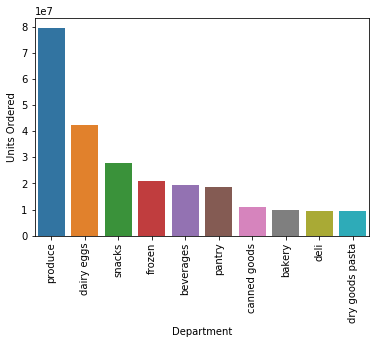

In [25]:
# most popular departments in terms of units ordered

x = sns.barplot(data = all_orders.groupby('department')['add_to_cart_order'].sum().sort_values(ascending = False).reset_index()[0:10], x = 'department', y = 'add_to_cart_order')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)
x.set(xlabel = 'Department', ylabel = 'Units Ordered')

[Text(0, 0.5, 'Department Share'), Text(0.5, 0, 'Department')]

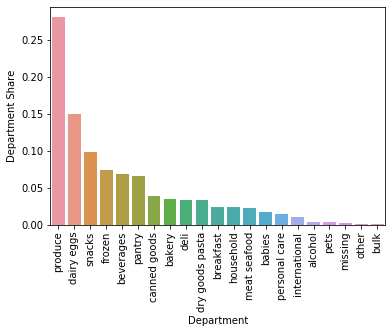

In [34]:
department_share = all_orders.groupby('department')['add_to_cart_order'].sum().reset_index()
department_share['department_share'] = department_share['add_to_cart_order']
department_share['department_share'] = department_share['department_share'].apply(lambda x: x / department_share['add_to_cart_order'].sum())

x = sns.barplot(data = department_share.sort_values(by = 'department_share',ascending = False), x = 'department', y = 'department_share')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)
x.set(xlabel = 'Department', ylabel = 'Department Share')

In [35]:
all_orders.department.nunique()

21

[Text(0, 0.5, 'Units Ordered'), Text(0.5, 0, 'Aisle')]

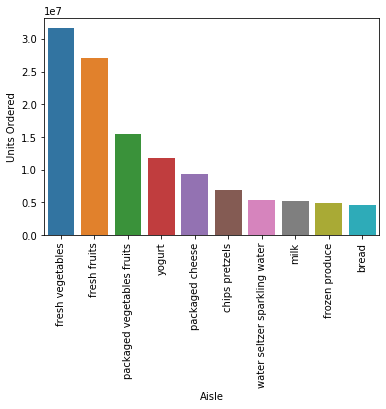

In [10]:
# most popular aisles in terms of units ordered

x = sns.barplot(data = all_orders.groupby('aisle')['add_to_cart_order'].sum().sort_values(ascending = False).reset_index()[0:10], x = 'aisle', y = 'add_to_cart_order')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)
x.set(xlabel = 'Aisle', ylabel = 'Units Ordered')

[Text(0, 0.5, 'Aisle Share'), Text(0.5, 0, 'Aisle')]

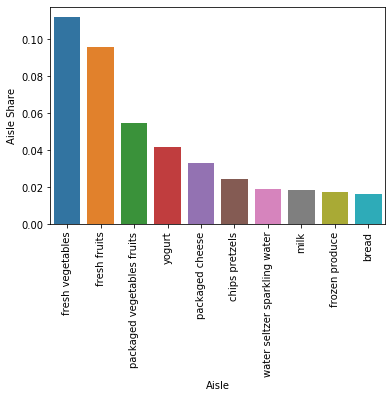

In [11]:
# create barchart showing share instead of units for top aisles

aisle_share = all_orders.groupby('aisle')['add_to_cart_order'].sum().reset_index()
aisle_share['aisle_share'] = aisle_share['add_to_cart_order']
aisle_share['aisle_share'] = aisle_share['aisle_share'].apply(lambda x: x / aisle_share['add_to_cart_order'].sum())

x = sns.barplot(data = aisle_share.sort_values(by = 'aisle_share',ascending = False)[0:10], x = 'aisle', y = 'aisle_share')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)
x.set(xlabel = 'Aisle', ylabel = 'Aisle Share')

[Text(0, 0.5, 'Units Ordered'), Text(0.5, 0, 'Product Name')]

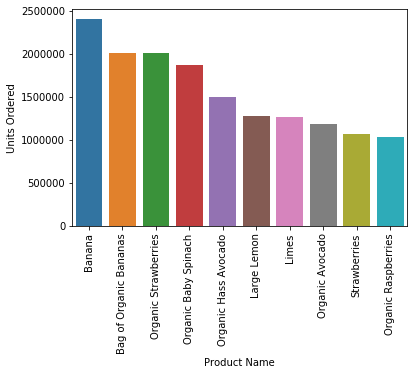

In [12]:
# most popular items in terms of units ordered

x = sns.barplot(data = all_orders.groupby('product_name')['add_to_cart_order'].sum().sort_values(ascending = False).reset_index()[0:10], x = 'product_name', y = 'add_to_cart_order')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)
x.set(xlabel = 'Product Name', ylabel = 'Units Ordered')

[Text(0, 0.5, 'Unit Share'), Text(0.5, 0, 'Product Name')]

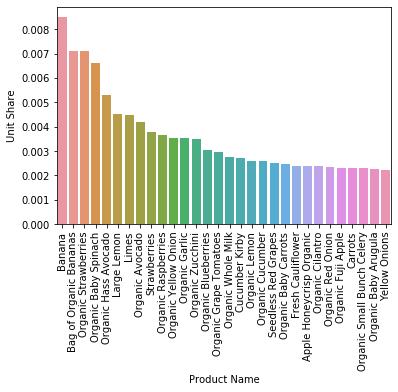

In [13]:
# create barchart showing share instead of units for top products

product_share = all_orders.groupby('product_name')['add_to_cart_order'].sum().reset_index()
product_share['product_share'] = product_share['add_to_cart_order']
product_share['product_share'] = product_share['product_share'].apply(lambda x: x / product_share['add_to_cart_order'].sum())

x = sns.barplot(data = product_share.sort_values(by = 'product_share',ascending = False)[0:30], x = 'product_name', y = 'product_share')
x.set_xticklabels(x.get_xticklabels(), rotation = 90)
x.set(xlabel = 'Product Name', ylabel = 'Unit Share')

In [48]:
pd.set_option('display.min_rows',10000)
all_orders.groupby('product_name')['add_to_cart_order'].sum().sort_values(ascending = False)[0:1000]

product_name
Banana                                                       2405664
Bag of Organic Bananas                                       2007396
Organic Strawberries                                         2005999
Organic Baby Spinach                                         1870623
Organic Hass Avocado                                         1497887
Large Lemon                                                  1279007
Limes                                                        1261016
Organic Avocado                                              1187054
Strawberries                                                 1065577
Organic Raspberries                                          1031044
Organic Yellow Onion                                         1004141
Organic Garlic                                               1001654
Organic Zucchini                                              986367
Organic Blueberries                                           862073
Organic Grape Tomatoe

User summary statistics- how much, how often, when do people order?

In [46]:
# summary of number of orders by user

all_orders.groupby('user_id')['order_id'].nunique().describe()

count    206209.000000
mean         16.226658
std          16.662238
min           3.000000
25%           6.000000
50%          10.000000
75%          20.000000
max         100.000000
Name: order_id, dtype: float64

[Text(0.5, 0, 'Orders/User')]

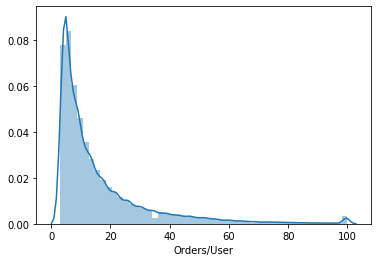

In [19]:
# distribution plot of orders/user

x = sns.distplot(all_orders.groupby('user_id')['order_id'].nunique())
x.set(xlabel = 'Orders/User')

In [47]:
# summary of units ordered/customer over the year

all_orders.groupby('user_id')['add_to_cart_order'].sum().describe()

count    206209.000000
mean       1372.342643
std        2489.390476
min           3.000000
25%         203.000000
50%         568.000000
75%        1483.000000
max      138990.000000
Name: add_to_cart_order, dtype: float64

[Text(0.5, 0, 'Units Ordered/User')]

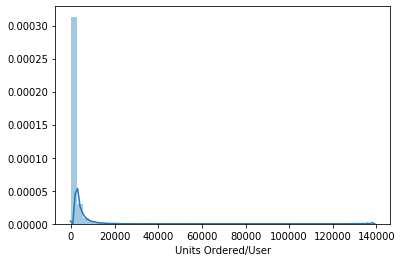

In [15]:
# distplot of number of units ordered/customer ordered over the year

x = sns.distplot(all_orders.groupby('user_id')['add_to_cart_order'].sum())
x.set(xlabel = 'Units Ordered/User')

In [36]:
# summary of order size

all_orders.groupby('order_id')['add_to_cart_order'].sum().describe()

count    3.346083e+06
mean     8.457334e+01
std      1.355298e+02
min      1.000000e+00
25%      1.500000e+01
50%      3.600000e+01
75%      1.050000e+02
max      1.058500e+04
Name: add_to_cart_order, dtype: float64

[Text(0.5, 0, 'Units/Order')]

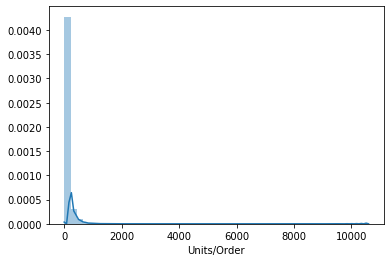

In [16]:
# distplot of number of units/order

x = sns.distplot(all_orders.groupby('order_id')['add_to_cart_order'].sum())
x.set(xlabel = 'Units/Order')

[Text(0.5, 0, 'Units/Order')]

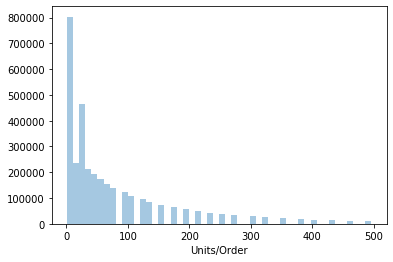

In [23]:
# cutoff previous distplot 500 units

order_size = all_orders.groupby('order_id')['add_to_cart_order'].sum().reset_index()

x = sns.distplot(order_size[order_size['add_to_cart_order'] < 500]['add_to_cart_order'], kde = False)
x.set(xlabel = 'Units/Order')

In [65]:
# summary statistics for average time between orders by user

orders.groupby('user_id')['days_since_prior_order'].mean().describe()

count    206209.000000
mean         15.448686
std           6.915575
min           0.000000
25%           9.814815
50%          15.000000
75%          20.625000
max          30.000000
Name: days_since_prior_order, dtype: float64

[Text(0.5, 0, 'Average Days Between Orders By User')]

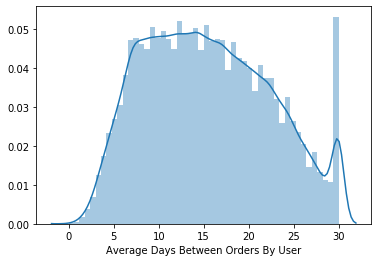

In [22]:
# distplot for time between orders

x = sns.distplot(orders.groupby('user_id')['days_since_prior_order'].mean())
x.set(xlabel = 'Average Days Between Orders By User')